In [59]:
import PIL
import torch
import torchvision

import matplotlib.pyplot as plt

from style_modules import ContentLoss, StyleLoss, TotalVariationLoss
from style_utils import preprocess, style_transfer

#### Style transfer

In [60]:
cthulhu = PIL.Image.open('styles_images/cthulhu.jpg')

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


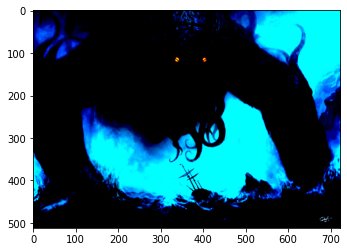

In [62]:
plt.imshow(preprocess(cthulhu)[0].permute((1, 2, 0)))

In [65]:
content_loss = ContentLoss()
style_loss = StyleLoss()
tv_loss = TotalVariationLoss()

dtype = torch.FloatTensor

cnn = torchvision.models.squeezenet1_1(pretrained=True).features
cnn.type(dtype)

# Fix the weights of the pretrained network
for param in cnn.parameters():
    param.requires_grad = False

content_source = "toronto"
style_source = "hell"
    
params = {
    'name': f"{style_source}_{content_source}",
    'content_image' : f"styles_images/{content_source}.jpg",
    'style_image' : f"styles_images/{style_source}.jpg",
    'image_size' : 192,
    'style_size' : 192,
    'content_layer' : 3,
    'content_weight' : 6e-2,
    'style_layers' : [1, 4, 6, 7],
    'style_weights' : [300000, 1000, 15, 3],
    'tv_weight' : 2e-2,
    'content_loss': content_loss,
    'style_loss': style_loss,
    'tv_loss': tv_loss,
    'cnn': cnn,
    'dtype': dtype
}

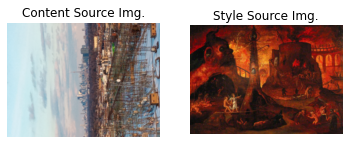

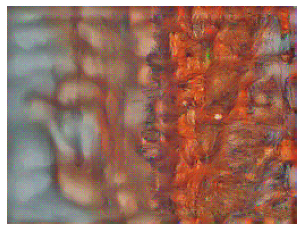

In [66]:
style_transfer(**params)